# SWMAL Exercise


## Convolutional Neural Networks (CNNs)
<details>
For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.
Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

</details>

CNNs, short for Convolutional Neural Network, is a type of deep learning model, that is used for processing grid-like data, such as images or video classification, in general series data and pattern recognition.

CNNs consist of different layers, that make up the functionality of the model.

`Convolutional layers` are layers that apply learnable filters (kernels) to small regions of the input data. This makes the network automatically learn the features from the data. The layer helps capture patterns or elations in visual content. 

`Pooling Layer` reduces the dimensionality, which can be reduced by the amounts of pixel. This can be done by down sampling. 
The pooling layer has different approaches, such as, max pooling, average pooling and etc. Maxpooling takes the maximum value from a group of neighbouring pixels to the input feature map, while average pooling takes the average of all values in the local region

`Fully Connected Layers` is after serveral convolution and pooling layers. There can be more than one of these layers and they act as a traditional neural network. Meaning they connect ever neuron from the previous layer to ever neuron in the next layer. 

`Activation Functions` is the non-linearity in the model. This can be ReLu, sigmoid or many more. It helps the model to learn complex relationships between features. 

`Multiple Channels` is often used with process images. Which allow to have multiple channels for each colour and for the outline of entity. The convolutional filters are applied independently to each channet. 

**Generalization**

We are using a stratified k-fold cross-validation. K-fold is splitting the training set into k folds, then trainingthe model *k* times, holding out a different fold each time for evaluation. Stratified means maintenance the same propertions of classes as the orignal dataset when creating subsets or fold for training and validation. So the stratified k-fold performs strtified sampling to prodcue folds that contain a representative ratio of each class. With each iteration the code crates a clone of the classifer. With the clone we trains on the training folds and make prediction on the test fold. And then count the number of correct prediction and output the ratio of correct predictions. 

**Learning Curve** 

For the learning curves we plot two plot, one training loss over iterations and training accuracy over iterations. The x-axis is the number of epoch in both plots, and the y-axis is either the loss  or the accuracy.
Training loss is a measure of how well the machine learning model is performing on the training data. We can observe that thoughout epochs training loss minimize and the predicted value becomes closer to the actual value. 
Training accuracy is the accuracy over each epoch. As we can observe that toughtout the epoch we becomes closer to 1. of course it do not rise for every epoch, but the overall curve does.

**Code setup**
We are using a CNN and the dataset is frim mnist.
1. We load the libary we are using
2. We create train and test data from mnist  
3. We Preprocess the data with reshape and as type and convert y into one-hot encoded formate, so meaning each class is represented as a binary vector.
4. Create the CNN model (Explaining with the piceture)
5. Set up Stratified K-Fold cross-validation and lists to store training metrics at each iteration
6. Loop over folds and use the right data fold
7. Loop over epochs where we store each iteration for this fold
8. After we put the store epochs data into our metrics for this fold
9. Then we evaluate this fold
10. All folds is trained and evaluate
11. Calculate average test accuracy across folds
12. Convert lists to NumPy arrays for easier plotting
13. Plot Training Loss
14. Plot Accuracy Loss

**CNN setup**


**Iterations towards the end-goal**
The first thing that supprised us was the did not come  preparred, but need reshaping.

In the first creation of the code we inline the epoch in the model. ```model.fit(X_train_kfold, y_train_kfold, epochs=17, batch_size=64, verbose=0)```. The problem here was creating the plots, so we adjust the epochs to be in a forloop. This could probally be done more smoothly, however this works. 

**Experiment**
We did a little expriment, but not so much maybe since we got a good accuracy form the very start. ```Test average accuracy: 0.9915000200271606```. We tried changing the epochs from 10 to 15 to 17... and tried to change how many folds we performed. BJARKE IS GOING TO TEST THE REST ON HES PC LATER AND GIVE SOME NUMBER...
REMEMBER WHAT WORK AND NOT!

**Conclusion**

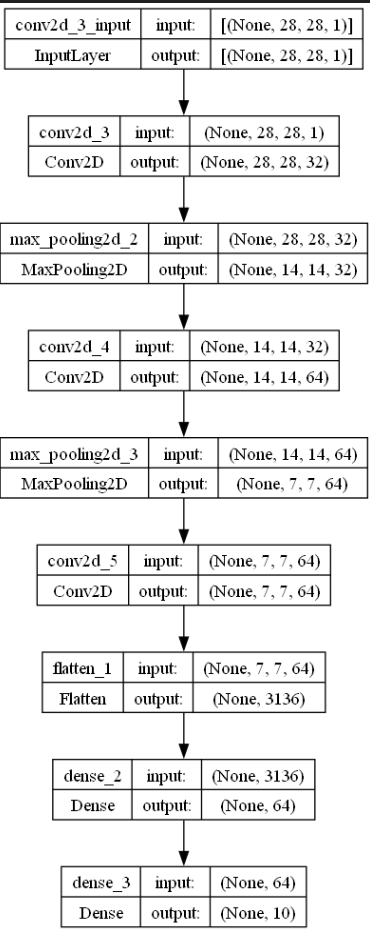

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
=================================================================
Total params: 257,162
Trainable params: 257,162
Non-trainable params: 0
_________________________________________________________________

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__


In [1]:
from keras.datasets.mnist import load_data
from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

(X_train, y_train ), (X_test, y_test) = load_data()

# Remove first element
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1 , 28, 28, 1)).astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 3, 3 means pixel... creates a 3x 3 pixels.
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same",activation='relu', input_shape=(28, 28 , 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

folds = 3
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
test_accuracy = []

train_losses = []
train_accuracies = []


for train, val in kfold.split(X_train, y_train.argmax(1)):

    model = createModel()

    X_train_kfold, x_val_kfold = X_train[train], X_train[val]
    y_train_kfold, y_val_kfold = y_train[train], y_train[val]

    fold_train_losses = []
    fold_train_accuracies = []

    for epoch in range(17): 
        history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

        fold_train_losses.append(history.history['loss'][0])
        fold_train_accuracies.append(history.history['accuracy'][0])

    train_losses.append(fold_train_losses)
    train_accuracies.append(fold_train_accuracies)


    test_loss, test_accuracy = model.evaluate(X_test, y_test)

avg_accuracy = np.mean(test_accuracy)
print(f'Test average accuracy: {avg_accuracy}')

train_losses = np.array(train_losses)
train_accuracies = np.array(train_accuracies)

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses, axis=0), label='Training Loss')
plt.title('Training Loss Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies, axis=0), label='Training Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


KeyboardInterrupt: 

# SWMAL Exercise

## Generalization Error
<details><summary>Description</summary>
In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">
</details>

### Qa) On Generalization Error
<details><summary>Description</summary>
Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.
  </details>
<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


  We gave Chat-gpt a link to the graph and the Qa description to see if it could solve the assignment, however we have also explained the terms in our own words underneath. This is the result:

<details><summary>ChatGTP answer</summary>
  1. Training and Generalization Error:
Training Error (Blue Curve): This curve represents the error (loss) on the training dataset as the capacity (complexity) of the model increases. Initially, the error decreases as the model becomes more complex, indicating better fit to the training data.

Generalization Error (Red Curve): This curve represents the error (loss) on an unseen test/validation dataset. It measures how well the model performs on new, unseen data that it wasn't trained on.

2. Underfit and Overfit Zone:
Underfitting (Left Side): When the model's capacity is too low (left side of the graph), it struggles to capture the underlying patterns in the data. Both the training and generalization errors are high. This is a sign of insufficient complexity.

Overfitting (Right Side): As the model's capacity increases, it starts to fit not only the underlying patterns but also the noise in the training data. This leads to a significant drop in training error but an increase in generalization error. The model is now fitting the noise, which is detrimental for unseen data.

3. Optimal Capacity:
Optimal Capacity (Middle Area): The sweet spot in the middle represents the optimal capacity of the model. It's the point where the generalization error is minimized. The model has enough complexity to capture the underlying patterns without overfitting to the noise.
4. Generalization Gap:
Generalization Gap (Vertical Distance): It's the vertical distance between the training error curve and the generalization error curve. It measures the difference in performance between the training and test datasets. A large gap indicates overfitting, while a small gap indicates good generalization.
5. Axes: x/Capacity, y/Error:
x-axis (Capacity): This represents the complexity or capacity of the model. It's a measure of how flexible the model is in capturing intricate patterns in the data.

y-axis (Error): This axis shows the error (loss) associated with the model's predictions. Lower values indicate better performance, while higher values indicate poorer performance.

In summary, Figure 5.3 illustrates the trade-off between the complexity of a model (capacity) and its ability to generalize to new, unseen data. The goal is to find the optimal capacity that minimizes the generalization error, striking a balance between underfitting and overfitting.
</details>




On the graph a the y-axis describes the error amount, aka how often the model makes a wrong or partially incorrect prediction. The x-axis describes the capacity of the model, aka how capable or complex the model is. This can be increased by for example adding more neurons per layer, adding more total layers or switching to a more complex model.  

**training error**
The blue curve is training error. The training error curve describes the error percentage in relation to the capacity/complexity of the training model when used on the training data. Naturally when we increase the power of our model, the model should be able to understand and more patterns in the data. This is however not necnecessarily a good thing which will be elaborated in the overfitting segment.

**Generalization error**
The green curve is the Generalization error. The generalization error describes the error percentage in relation to the capacity/complexity of the training model when used on unseen test data. 

**Underfitting**
Underfitting happens when a model is unable to understand enough of the patterns if any in the training and test data. This results in a higher training- and generalization error. If your model has a high generaliztion and tranning error it could be a sign that you have underfitted your model, and need to increase the complexity of the model. This can be done in many different ways.

**Overfitting**
Overfitting is when a too capable model is being used on a data set. This results in the model finding patterns in the "noise" of the training data that potntionally aren't relevant and therefore result in a higher generalization error. The Training error is typically very low since the very capable model has found all the patterns and more in the training data. If you experience a high generlization error and a very low training error it could be an indication that you need to reduce the capacity of your model, and the model has overcomplicated its understanding of the data. It could also be because there are patterns in the training data which are not present in the test data, so it would be a good idea to also check that you data-split correctly and mix the data.

**Generalization gap**
The generalization gap, is the vertical gap between the training error curve and the generalization curve. This means it describes the size of the difference between the errors that occur when the model is used on the training data and when the model is used on the test data.  It typically increases when the model has been overfitted.

**Optimal Capacity**
The optimal capacity is the perfect complexity for the model where it filters out the noise-patterns and picks up as many of the actual patterns as possible. This results in the training error generalization error and generalization gap being as low as possible. It is what you want to get as close to as possible when fitting you model. 


### Qb A MSE-Epoch/Error Plot
<details><summary>Description</summary>
Next, we look at a SGD model for fitting polynomial, that is _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE$_1$: the generalization plot figure 5.3 in [DL] (above) and the plots below have different x-axis, and are not to be compared directly!

NOTE$_2$: notice that a 90 degree polynomial is used for the polynomial regression. This is just to produce a model with an extremly high capacity.
</details>

*Part 1:*

The ```GenerateData()``` is used to generate random data points for ```X``` and add some noise to the random variable ```y``` to simulate realworld data. The `y` is a quadratic function, which is this mathimatical function f(x)=ax<sup>2</sup>+bx+c. After the the data is spilt into a training set and a validation set. 

After we create a pipeline which takes the PolynomialFeatures and StandardScaler. The 
After we create a pipeline which takes the PolynomialFeatures and StandardScaler. ```PolynomialFeatures``` is a prepocessor which have to inputs: the degree and the biased. We rotate the features 90 degree and don't include the bias. This is just to produce a model with an extremly high capacity. StandardScaler also a preprocesser, that standardized the featues in the dataset. This is done by removing the mean  and center the feature distribution around zero and after the scales the features variance. So this mean the variance of each feature will be 1.

The we train and validation set are transformed with ```X_train_poly_scaled = poly_scaler.fit_transform(X_train)``` and ``` X_val_poly_scaled   = poly_scaler.transform(X_val)```


*Part 2:*
 
Creates a function call Train. It takes the inputs ```def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False)```. It makes a array of errors for both the validation and train. Then we run a SDGResgresster with only one iteration, where we have a constant learning rate. 

There after we have a for loop we run though each number of epochs, where we fit and predict for both train and validation. TTen we add the MSE for training and validation to the respective error array. if the verbose is set too true we print out each epoch and MSE for training and validation. 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
The `epoch` is the number of training iteration. In each epoch train and validate the set and put it into a array. The `mse_train` is the mean squared error on the training set and it measures how well the it preform in this epoch. The same count for the `mse_val`. 
The output is use to help us monitor the training process and assess how well the model is learning form the data.


*Part 3:*

We find the best epoch using the minimum of our validate errors array. After that we calculate the RMSE for the best preform epoch. Then we plot out this epoch with a arrow. The plot is the epoch in the x-axis and RSME in the y-axis. A horizontal dotted line indicates the RMSE of the best model. The best model is the one with the lowest validation RMSE. This model will follow the underlying trend in the data without fitting too closely to the noise and is the best to unseen data. 

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


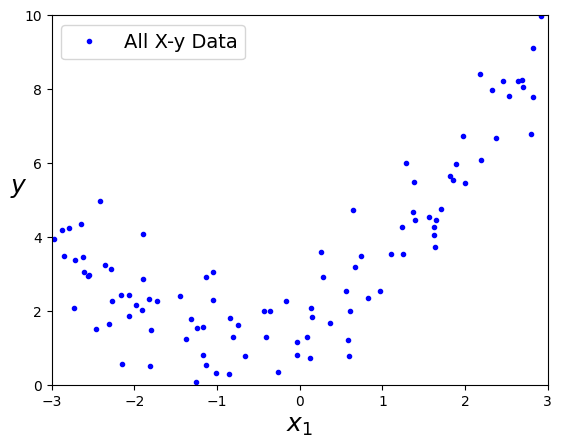

OK


In [3]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [4]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=-float(0),
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 127, mse_train=1.17, mse_val=1.94
  epoch= 128, mse_train=1.16, mse_val=1.92
  epoch= 129, mse_train=1.15, mse_val=1.91
  epoch= 130, mse_train=1.14, mse_val=1.89
  epoch= 131, mse_train=1.13, mse_val=1.88
  epoch= 132, mse_train=1.12, mse_val=1.87
  epoch= 133, mse_train=1.11, mse_val=1.85
  epoch= 134, mse_train=1.10, mse_val=1.84
  epoch= 135, mse_train=1.09, mse_val=1.83
  epoch= 136, mse_train=1.08, mse_val=1.81
  epoch= 137, mse_train=1.07, mse_val=1.80
  epoch= 138, mse_train=1.06, mse_val=1.79
  epoch= 139, mse_train=1.06, mse_val=1.78
  epoch= 140, mse_train=1.05, mse_val=1.77
  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 148, mse_train=0.99, mse_val=1.68
  epoch= 149, mse_train=0.98, mse_val=1.67
  epoch= 15

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 236, mse_train=0.68, mse_val=1.35
  epoch= 237, mse_train=0.68, mse_val=1.35
  epoch= 238, mse_train=0.68, mse_val=1.35
  epoch= 239, mse_train=0.68, mse_val=1.35
  epoch= 240, mse_train=0.68, mse_val=1.35
  epoch= 241, mse_train=0.68, mse_val=1.35
  epoch= 242, mse_train=0.67, mse_val=1.35
  epoch= 243, mse_train=0.67, mse_val=1.35
  epoch= 244, mse_train=0.67, mse_val=1.35
  epoch= 245, mse_train=0.67, mse_val=1.35
  epoch= 246, mse_train=0.67, mse_val=1.35
  epoch= 247, mse_train=0.67, mse_val=1.35
  epoch= 248, mse_train=0.67, mse_val=1.35
  epoch= 249, mse_train=0.67, mse_val=1.35
  epoch= 250, mse_train=0.66, mse_val=1.35
  epoch= 251, mse_train=0.66, mse_val=1.35
  epoch= 252, mse_train=0.66, mse_val=1.35
  epoch= 253, mse_train=0.66, mse_val=1.36
  epoch= 254, mse_train=0.66, mse_val=1.36
  epoch= 255, mse_train=0.66, mse_val=1.36
  epoch= 256, mse_train=0.66, mse_val=1.36
  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 25

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 350, mse_train=0.58, mse_val=1.54
  epoch= 351, mse_train=0.58, mse_val=1.54
  epoch= 352, mse_train=0.58, mse_val=1.55
  epoch= 353, mse_train=0.58, mse_val=1.55
  epoch= 354, mse_train=0.58, mse_val=1.55
  epoch= 355, mse_train=0.58, mse_val=1.55
  epoch= 356, mse_train=0.58, mse_val=1.56
  epoch= 357, mse_train=0.58, mse_val=1.56
  epoch= 358, mse_train=0.58, mse_val=1.56
  epoch= 359, mse_train=0.58, mse_val=1.57
  epoch= 360, mse_train=0.58, mse_val=1.57
  epoch= 361, mse_train=0.58, mse_val=1.57
  epoch= 362, mse_train=0.58, mse_val=1.57
  epoch= 363, mse_train=0.58, mse_val=1.58
  epoch= 364, mse_train=0.58, mse_val=1.58
  epoch= 365, mse_train=0.58, mse_val=1.58
  epoch= 366, mse_train=0.58, mse_val=1.59
  epoch= 367, mse_train=0.58, mse_val=1.59
  epoch= 368, mse_train=0.58, mse_val=1.59
  epoch= 369, mse_train=0.58, mse_val=1.59
  epoch= 370, mse_train=0.57, mse_val=1.60
  epoch= 371, mse_train=0.57, mse_val=1.60
  epoch= 372, mse_train=0.57, mse_val=1.60
  epoch= 37

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 472, mse_train=0.54, mse_val=1.91
  epoch= 473, mse_train=0.54, mse_val=1.91
  epoch= 474, mse_train=0.54, mse_val=1.91
  epoch= 475, mse_train=0.54, mse_val=1.92
  epoch= 476, mse_train=0.54, mse_val=1.92
  epoch= 477, mse_train=0.54, mse_val=1.92
  epoch= 478, mse_train=0.54, mse_val=1.92
  epoch= 479, mse_train=0.54, mse_val=1.93
  epoch= 480, mse_train=0.54, mse_val=1.93
  epoch= 481, mse_train=0.54, mse_val=1.93
  epoch= 482, mse_train=0.54, mse_val=1.94
  epoch= 483, mse_train=0.54, mse_val=1.94
  epoch= 484, mse_train=0.54, mse_val=1.94
  epoch= 485, mse_train=0.54, mse_val=1.95
  epoch= 486, mse_train=0.54, mse_val=1.95
  epoch= 487, mse_train=0.54, mse_val=1.95
  epoch= 488, mse_train=0.54, mse_val=1.95
  epoch= 489, mse_train=0.54, mse_val=1.96
  epoch= 490, mse_train=0.54, mse_val=1.96
  epoch= 491, mse_train=0.54, mse_val=1.96
  epoch= 492, mse_train=0.54, mse_val=1.97
  epoch= 493, mse_train=0.54, mse_val=1.97
  epoch= 494, mse_train=0.54, mse_val=1.97
  epoch= 49

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

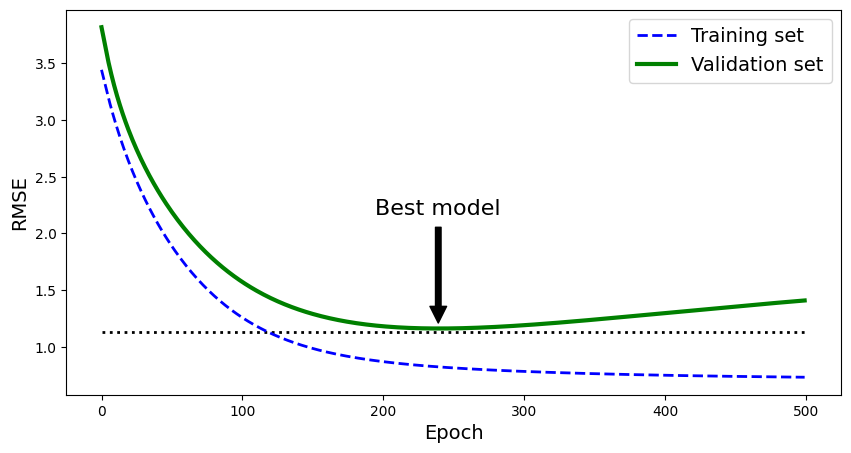

OK


In [5]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

### Qc)  Early Stopping
<details><summary>Description</summary>
How would you implement ___early stopping___, in the code above? 

Write an explanation of the early stopping concept...that is, just write some pseudo code that 'implements' the early stopping. 

OPTIONAL: also implement your early stopping pseudo code in Python, and get it to work with the code above (and not just flipping the hyperparameter to `early_stopping=True` on the `SGDRegressor`).
</details>


For implementing early_stopping i would before the for loop add two values. One for the model and one for the best model. Inside the for loop I would check if this iteration of validation error is better the the best validataion error. This means this iteration is less than the current best validation error. Then i would add a check when the value of the this iteration becomes bigger than the best value, then break.  

In [ ]:
best_val_error = float('inf')
best_model = None

#For loop here
    
    if val_error < best_val_error:
        best_val_error = val_error
        best_model = clone(sgd_reg)
    
    # Check for early stopping condition
    if val_error > best_val_error:
        print(f"Early stopping at epoch {epoch}")
        break

### Qd) Explain the Polynomial RMSE-Capacity plot
<details><summary>Description</summary>
Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below (code similar to what we saw in `capacity_under_overfitting.ipynb`), and explain the generated RMSE-Capacity plot. Why does the _training error_ keep dropping, while the _CV-error_ drops until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.
</details>



In [ ]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

# SWMAL Exercise

<details>
## Hyperparameters and Gridsearch 

When instantiating a Scikit-learn model in python most or all constructor parameters have _default_ values. These values are not part of the internal model and are hence called ___hyperparameters___---in contrast to _normal_ model parameters, for example the neuron weights, $\mathbf w$, for an `MLP` model.

### Manual Tuning Hyperparameters

Below is an example of the python constructor for the support-vector classifier `sklearn.svm.SVC`, with say the `kernel` hyperparameter having the default value `'rbf'`. If you should choose, what would you set it to other than `'rbf'`? 

```python
class sklearn.svm.SVC(
    C=1.0, 
    kernel=’rbf’, 
    degree=3,
    gamma=’auto_deprecated’, 
    coef0=0.0, 
    shrinking=True, 
    probability=False, 
    tol=0.001, 
    cache_size=200, 
    class_weight=None, 
    verbose=False, 
    max_iter=-1, 
    decision_function_shape=’ovr’, 
    random_state=None
  )
```  

The default values might be a sensible general starting point, but for your data, you might want to optimize the hyperparameters to yield a better result. 

To be able to set `kernel` to a sensible value you need to go into the documentation for the `SVC` and understand what the kernel parameter represents, and what values it can be set to, and you need to understand the consequences of setting `kernel` to something different than the default...and the story repeats for every other hyperparameter!

### Brute Force  Search

An alternative to this structured, but time-consuming approach, is just to __brute-force__ a search of interesting hyperparameters, and  choose the 'best' parameters according to a fit-predict and some score, say 'f1'. 

<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/gridsearch.png"  alt="WARNING: could not get image from server."  style="width:350px">
<small><em>
    <center> Conceptual graphical view of grid search for two distinct hyperparameters. </center> 
    <center> Notice that you would normally search hyperparameters like `alpha` with an exponential range, say [0.01, 0.1, 1, 10] or similar.</center>
</em></small>

Now, you just pick out some hyperparameters, that you figure are important, set them to a suitable range, say

```python
    'kernel':('linear', 'rbf'), 
    'C':[1, 10]
```
and fire up a full (grid) search on this hyperparameter set, that will try out all your specified combination of `kernel` and `C` for the model, and then prints the hyperparameter set with the highest score...

The demo code below sets up some of our well known 'hello-world' data and then run a _grid search_ on a particular model, here a _support-vector classifier_ (SVC)

Other models and datasets  ('mnist', 'iris', 'moon') can also be examined.
</details>

### Qa Explain GridSearchCV
<details><summary>Description</summary>
There are two code cells below: 1) function setup, 2) the actual grid-search.

Review the code cells and write a __short__ summary. Mainly focus on __cell 2__, but dig into cell 1 if you find it interesting (notice the use of local-function, a nifty feature in python).
  
In detail, examine the lines:  
  
```python
grid_tuned = GridSearchCV(model, tuning_parameters, ..
grid_tuned.fit(X_train, y_train)
..
FullReport(grid_tuned , X_test, y_test, time_gridsearch)
```
and write a short description of how the `GridSeachCV` works: explain how the search parameter set is created and the overall search mechanism is functioning (without going into too much detail).

What role does the parameter `scoring='f1_micro'` play in the `GridSearchCV`, and what does `n_jobs=-1` mean? 
</details>

Start with setting up the data with the function ```LoadAndSetUpData('iris')```, which load the dataset based on a string. It can load different data 'iris', 'moon', or 'mnist'. Inside the function it check the the data is valid and splits it into train and test set. 

Afterwards we set up the search parameters as a support vecotr machine classifier with the value ```gamma=0.001```. The gamma influence the decision boundary, so a lower gamma means it is more sensivtive to individual data points. 

We specifi some of the hyperparameter for the (full) grid search. Here we try out the specified combination of `kernel` and `C` for the model , and then prints the hyperparameter set with the highest score. `kernel` specifies that the grid search will use two different kernel types. The ``rbf` stand for radial basis function. `C` defines the values for the regularization parameter. The requlaization is used elude overfitting, because model learns the training data too well and struggles to generalize to new, unseen data.

The setting `CV` stands for how many cross-validation. `VERBOSE` is used for `observe` the training progress for each epoch. `verbos=0` will show you nothing (silent).

```GridSearchCV(model, tuning_parameters, cv=CV, scoring='f1_micro', verbose=VERBOSE, n_jobs=-1)``` creates a gridsearch object and inputs are the explaned parameter. It uses a f1_mirco as a score and it calculates the F1 score for each class, then computes the average, giving equal weight to each class. The last hyperparameter is uses all available processors for parallel computing (n_jobs=-1)

In [2]:
from time import time
import numpy as np
import sys

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn import datasets

import sys,os
sys.path.append(os.path.expanduser('../'))
from libitmal import dataloaders as itmaldataloaders # Needed for load of iris, moon and mnist

currmode="N/A" # GLOBAL var!

def SearchReport(model): 
    
    def GetBestModelCTOR(model, best_params):
        def GetParams(best_params):
            ret_str=""          
            for key in sorted(best_params):
                value = best_params[key]
                temp_str = "'" if str(type(value))=="<class 'str'>" else ""
                if len(ret_str)>0:
                    ret_str += ','
                ret_str += f'{key}={temp_str}{value}{temp_str}'  
            return ret_str          
        try:
            param_str = GetParams(best_params)
            return type(model).__name__ + '(' + param_str + ')' 
        except:
            return "N/A(1)"
        
    print("\nBest model set found on train set:")
    print()
    print(f"\tbest parameters={model.best_params_}")
    print(f"\tbest '{model.scoring}' score={model.best_score_}")
    print(f"\tbest index={model.best_index_}")
    print()
    print(f"Best estimator CTOR:")
    print(f"\t{model.best_estimator_}")
    print()
    try:
        print(f"Grid scores ('{model.scoring}') on development set:")
        means = model.cv_results_['mean_test_score']
        stds  = model.cv_results_['std_test_score']
        i=0
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            print("\t[%2d]: %0.3f (+/-%0.03f) for %r" % (i, mean, std * 2, params))
            i += 1
    except:
        print("WARNING: the random search do not provide means/stds")
    
    global currmode                
    assert "f1_micro"==str(model.scoring), f"come on, we need to fix the scoring to be able to compare model-fits! Your scoreing={str(model.scoring)}...remember to add scoring='f1_micro' to the search"   
    return f"best: dat={currmode}, score={model.best_score_:0.5f}, model={GetBestModelCTOR(model.estimator,model.best_params_)}", model.best_estimator_ 

def ClassificationReport(model, X_test, y_test, target_names=None):
    assert X_test.shape[0]==y_test.shape[0]
    print("\nDetailed classification report:")
    print("\tThe model is trained on the full development set.")
    print("\tThe scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)                 
    print(classification_report(y_true, y_pred, target_names=target_names))
    print()
    
def FullReport(model, X_test, y_test, t):
    print(f"SEARCH TIME: {t:0.2f} sec")
    beststr, bestmodel = SearchReport(model)
    ClassificationReport(model, X_test, y_test)    
    print(f"CTOR for best model: {bestmodel}\n")
    print(f"{beststr}\n")
    return beststr, bestmodel
    
def LoadAndSetupData(mode, test_size=0.3):
    assert test_size>=0.0 and test_size<=1.0
    
    def ShapeToString(Z):
        n = Z.ndim
        s = "("
        for i in range(n):
            s += f"{Z.shape[i]:5d}"
            if i+1!=n:
                s += ";"
        return s+")"

    global currmode
    currmode=mode
    print(f"DATA: {currmode}..")
    
    if mode=='moon':
        X, y = itmaldataloaders.MOON_GetDataSet(n_samples=5000, noise=0.2)
        itmaldataloaders.MOON_Plot(X, y)
    elif mode=='mnist':
        X, y = itmaldataloaders.MNIST_GetDataSet(load_mode=0)
        if X.ndim==3:
            X=np.reshape(X, (X.shape[0], -1))
    elif mode=='iris':
        X, y = itmaldataloaders.IRIS_GetDataSet()
    else:
        raise ValueError(f"could not load data for that particular mode='{mode}', only 'moon'/'mnist'/'iris' supported")
        
    print(f'  org. data:  X.shape      ={ShapeToString(X)}, y.shape      ={ShapeToString(y)}')

    assert X.ndim==2
    assert X.shape[0]==y.shape[0]
    assert y.ndim==1 or (y.ndim==2 and y.shape[1]==0)    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0, shuffle=True
    )
    
    print(f'  train data: X_train.shape={ShapeToString(X_train)}, y_train.shape={ShapeToString(y_train)}')
    print(f'  test data:  X_test.shape ={ShapeToString(X_test)}, y_test.shape ={ShapeToString(y_test)}')
    print()
    
    return X_train, X_test, y_train, y_test

def TryKerasImport(verbose=True):
    
    kerasok = True
    try:
        import keras as keras_try
    except:
        kerasok = False

    tensorflowkerasok = True
    try:
        import tensorflow.keras as tensorflowkeras_try
    except:
        tensorflowkerasok = False
        
    ok = kerasok or tensorflowkerasok
    
    if not ok and verbose:
        if not kerasok:
            print("WARNING: importing 'keras' failed", file=sys.stderr)
        if not tensorflowkerasok:
            print("WARNING: importing 'tensorflow.keras' failed", file=sys.stderr)

    return ok
    
print(f"OK(function setup" + ("" if TryKerasImport() else ", hope MNIST loads works because it seems you miss the installation of Keras or Tensorflow!") + ")")

OK(function setup)


In [2]:
# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = svm.SVC(
    gamma=0.001
)  # NOTE: gamma="scale" does *not work in older Scikit-learn frameworks,
# FIX:  replace with model = svm.SVC(gamma=0.001)

tuning_parameters = {
    'kernel': ('linear', 'rbf'), 
    'C': [0.1, 1, 10]
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 1.43 sec

Best model set found on train set:

	best parameters={'C': 1, 'kernel': 'linear'}
	best 'f1_micro' score=0.9714285714285715
	best index=2

Best estimator CTOR:
	SVC(C=1, gamma=0.001, kernel='linear')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.962 (+/-0.093) for {'C': 0.1, 'kernel': 'linear'}
	[ 1]: 0.371 (+/-0.038) for {'C': 0.1, 'kernel': 'rbf'}
	[ 2]: 0.971 (+/-0.047) for {'C': 1, 'kernel': 'linear'}
	[ 3]: 0.695 (+/-0.047) for {'C': 1, 'kernel': 'rbf'}
	[ 4]: 0.952 (+/-0.085) for {'C': 10, 'kernel': 'linear'}
	[ 5]: 0.924 (+/-0.097) for {'C': 10, 'kernel': 'rbf'}

Detailed classification report:
	The model is trained on the full development set.
	The scores are computed on the full evaluation set.

              precision    recall  f1-score  

### Qb Hyperparameter Grid Search using an SDG classifier
<details><summary>Description</summary>
Now, replace the `svm.SVC` model with an `SGDClassifier` and a suitable set of the hyperparameters for that model.

You need at least four or five different hyperparameters from the `SGDClassifier` in the search-space before it begins to take considerable compute time doing the full grid search.

So, repeat the search with the `SGDClassifier`, and be sure to add enough hyperparameters to the grid-search, such that the search takes a considerable time to run, that is a couple of minutes or up to some hours..
</details>

We have now replaced the `svm.SVC` model with an `SGDClassifier` and changed the hyperparameter for the model. We know uses the parameter different loss function. We also put max number of iteration and regularization for reduce overfitting, however also less flexible model. eta0 is the initial learning rate. Penalty is the detementain the type of regulaization.
```
tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 20],
}
```

as we can observe the best parameter was

```
Best estimator CTOR:
	SGDClassifier(alpha=0.001, eta0=0.01, loss='perceptron', max_iter=300,
              penalty='l1', random_state=42)
```

In [7]:
from sklearn.linear_model import SGDClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = SGDClassifier(
    loss='hinge',
    random_state=42
)  

tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 20],
}


CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 11.04 sec

Best model set found on train set:

	best parameters={'alpha': 0.001, 'early_stopping': False, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 300, 'n_iter_no_change': 20, 'penalty': 'l1', 'power_t': 0.1, 'validation_fraction': 0.1}
	best 'f1_micro' score=0.9904761904761905
	best index=1672

Best estimator CTOR:
	SGDClassifier(alpha=0.001, eta0=0.01, loss='perceptron', max_iter=300,
              n_iter_no_change=20, penalty='l1', power_t=0.1, random_state=42)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.905 (+/-0.085) for {'alpha': 0.0001, 'early_stopping': False, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 300, 'n_iter_no_change': 5, 'penalty': 'l1', 'power_t': 0.1, 'validation_fraction': 0

### Qc Hyperparameter Random  Search using an SDG classifier
<details><summary>Description</summary>
Now, add code to run a `RandomizedSearchCV` instead.

<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/randomsearch.png" alt="WARNING: could not get image from server."  style="width:350px" >
<small><em>
    <center> Conceptual graphical view of randomized search for two distinct hyperparameters. </center> 
</em></small>

Use these default parameters for the random search, similar to the default parameters for the grid search

```python
random_tuned = RandomizedSearchCV(
    model, 
    tuning_parameters, 
    n_iter=20, 
    random_state=42, 
    cv=CV, 
    scoring='f1_micro', 
    verbose=VERBOSE, 
    n_jobs=-1
)
```

but with the two new parameters, `n_iter` and `random_state` added. Since the search-type is now random, the `random_state` gives sense, but essential to random search is the new `n_tier` parameter.

So: investigate the `n_iter` parameter...in code and write a conceptual explanation  in text.

Comparison of time (seconds) to complete `GridSearch` versus `RandomizedSearchCV`, does not necessarily give any sense, if your grid search completes in a few seconds (as for the iris tiny-data). You need a search that runs for minutes, hours, or days.

But you could compare the best-tuned parameter set and best scoring for the two methods. Is the random search best model close to the grid search?  
</details>


We have now replaced the `GridSearchCV` with`RandomizedSearchCV`. `n_iter` parameter represents the numbe of iterations over the training dataset. It allow the model to learn for mthe traning data and avoid excessive training times. 

We have train this with alot of hyperparameters, however it did not take that long time to train. However we try to add one more hyperparameter and it took such a long time we gave up.

The result we get are the following for `GridSearch`:
```best: dat=iris, score=0.99048, model=SGDClassifier(alpha=0.001,early_stopping=False,eta0=0.01,learning_rate='optimal',loss='perceptron',max_iter=300,n_iter_no_change=20,penalty='l1',power_t=0.1,validation_fraction=0.1)```
SEARCH TIME: 11.04 sec

And for `RandomizedSearch`:
SEARCH TIME: 0.08 sec
```best: dat=iris, score=0.96190, model=SGDClassifier(alpha=0.01,early_stopping=False,eta0=0.1,learning_rate='optimal',loss='hinge',max_iter=1400,n_iter_no_change=5,penalty='l1',power_t=0.5,validation_fraction=0.2)```

What we can obeserve is that GridSearch is diffently a better result than RandomGridSearch. It was two different models and iteration that was best for each model. There is a long way from 0.96 to 0.99, so random search best model  is not close to the grid search. 



In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = SGDClassifier(
    loss='hinge',
    random_state=42
)  

tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 20],
}

CV = 5
VERBOSE = 0

# Run RandomizedSearchCV for the model
grid_tuned = RandomizedSearchCV(model, 
                                tuning_parameters, 
                                n_iter=20, 
                                random_state=42, 
                                cv=CV, 
                                scoring='f1_micro', 
                                verbose=VERBOSE, 
                                n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 0.14 sec

Best model set found on train set:

	best parameters={'validation_fraction': 0.2, 'power_t': 0.5, 'penalty': 'l1', 'n_iter_no_change': 5, 'max_iter': 1400, 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 0.1, 'early_stopping': False, 'alpha': 0.01}
	best 'f1_micro' score=0.9619047619047618
	best index=1

Best estimator CTOR:
	SGDClassifier(alpha=0.01, eta0=0.1, max_iter=1400, penalty='l1',
              random_state=42, validation_fraction=0.2)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.905 (+/-0.104) for {'validation_fraction': 0.1, 'power_t': 0.5, 'penalty': 'l2', 'n_iter_no_change': 5, 'max_iter': 300, 'loss': 'perceptron', 'learning_rate': 'invscaling', 'eta0': 0.01, 'early_stopping': False, 'alpha': 0.01}
	[ 1]: 0.962 (+/-0.038) for {'v

## Qd MNIST Search Quest II
<details><summary>Description</summary>
Finally, a search-quest competition: __who can find the best model+hyperparameters for the MNIST dataset?__

You change to the MNIST data by calling `LoadAndSetupData('mnist')`, and this is a completely other ball-game that the iris _tiny-data_: it's much larger (but still far from _big-data_)!

* You might opt for the exhaustive grid search, or use the faster but-less optimal random search...your choice. 

* You are free to pick any classifier in Scikit-learn, even algorithms we have not discussed yet---__except Neural Networks and KNeighborsClassifier!__. 

* Keep the score function at `f1_micro`, otherwise, we will be comparing 'æbler og pærer'. 

* And, you may also want to scale your input data for some models to perform better.

* __REMEMBER__, DO NOT USE any Neural Network models. This also means not to use any `Keras` or `Tensorflow` models...since they outperform most other models, and there are also too many examples on the internet to cut-and-paste from!

Check your result by printing the first _return_ value from `FullReport()` 
```python 
b1, m1 = FullReport(random_tuned , X_test, y_test, time_randomsearch)
print(b1)
```
that will display a result like
```
best: dat=mnist, score=0.90780, model=SGDClassifier(alpha=1.0,eta0=0.0001,learning_rate='invscaling')
```
and paste your currently best model into the message box, for ITMAL group 09 like
```
Grp09: best: dat=mnist, score=0.90780, model=SGDClassifier(alpha=1.0,eta0=0.0001,learning_rate='invscaling')

Grp09: CTOR for best model: SGDClassifier(alpha=1.0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
```
              
on Brightspace: "L09: Regularisering, optimering og søgning" | "Qd MNIST Search Quest"

> https://itundervisning.ase.au.dk/itmal_quest/index.php

and, check if your score (for MNIST) is better than the currently best score. Republish if you get a better score than your own previously best. Deadline for submission of scores is the same as the deadline for the O3 journal handin.

Remember to provide an ITMAL group name manually, so we can identify a winner: the 1. st price is  cake! 

For the journal hand-in, report your progress in scoring choosing different models, hyperparameters to search and how you might need to preprocess your data...and note, that the journal will not be accepted unless it contains information about Your results published on the Brightspace 'Search Quest II' page!
</details>

We NEED MY

```best: dat=mnist, score=0.96771, model=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=5,n_estimators=200)```

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'mnist')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = RandomForestClassifier(
    random_state=42
)  

tuning_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = RandomizedSearchCV(model, 
                                tuning_parameters, 
                                n_iter=20, 
                                random_state=42, 
                                cv=CV, 
                                scoring='f1_micro', 
                                verbose=VERBOSE, 
                                n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: mnist..
  org. data:  X.shape      =(70000;  784), y.shape      =(70000)
  train data: X_train.shape=(49000;  784), y_train.shape=(49000)
  test data:  X_test.shape =(21000;  784), y_test.shape =(21000)

SEARCH TIME: 408.01 sec

Best model set found on train set:

	best parameters={'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
	best 'f1_micro' score=0.9677142857142856
	best index=13

Best estimator CTOR:
	RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=5, n_estimators=200, random_state=42)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.959 (+/-0.005) for {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}
	[ 1]: 0.946 (+/-0.002) for {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqr

# SWMAL Exercise

## Advanced CNN using Roboflow

Read the web page 'How to Train YOLOv8 Object Detection on a Custom Dataset' 

> https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

Then create your own Roboflow project, with some data of your choice found on the site using

> https://universe.roboflow.com/

and clone an existing project. The Roboflow 'pipeline'<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) includes many steps

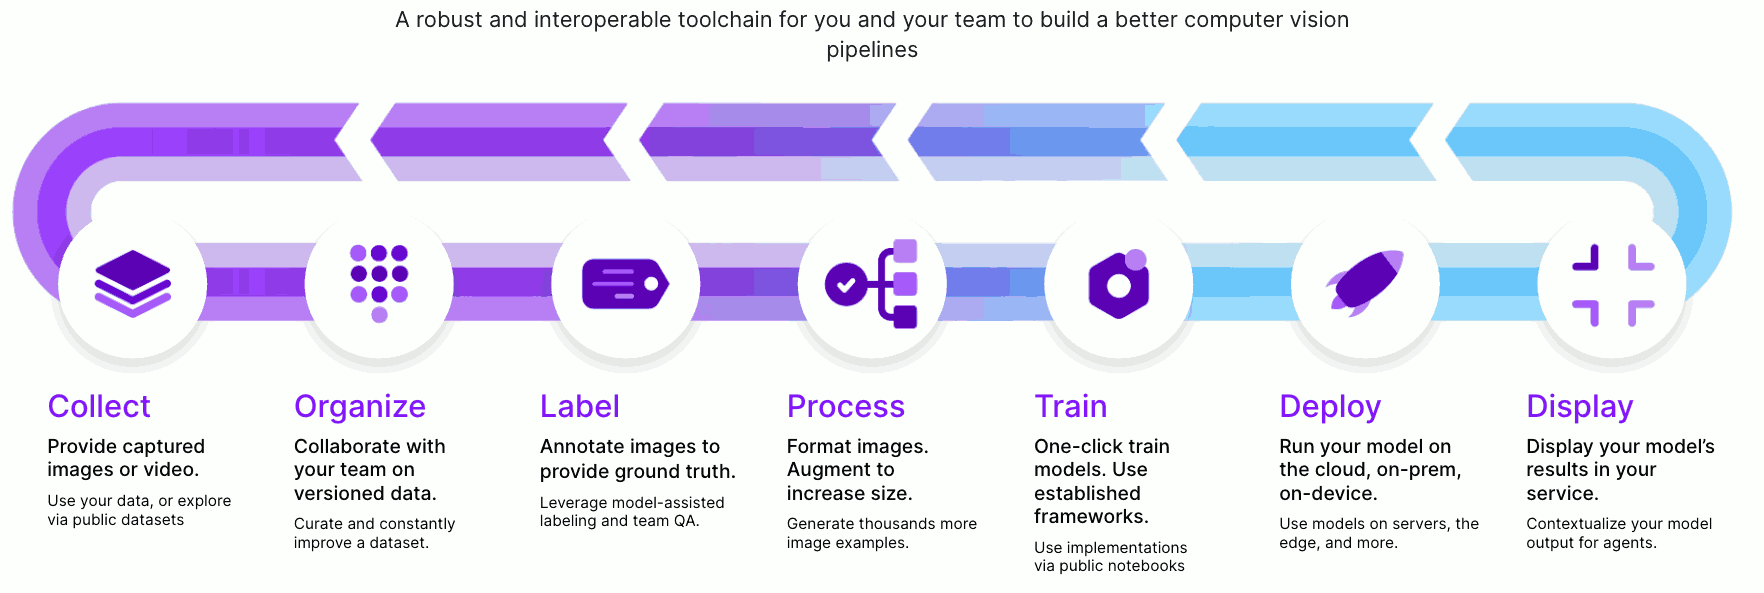

here you only want to look into the _process_ and _train_ steps and take a peek into the _collect_, _organize_ and _labelling_ step, which is normally the most time-consuming part of any ML project.

The current computer vision/ML projects ohn Roboflow include object detection, classification, instance segmentation and semantic segmentation, and you are free to choose between the different computer vision-related concepts, but object detection and classification would probably be the best choice for this journal (instance and semantic segmentation are highly complicated processes.)

Train and test a model and make documentation of the process for the journal, using images, and learning graphs. etc. from the site. 

(Notice, that there is no obvious way of getting hands-on any code behind the 'pipeline' in Roboflow, if, say you want to elaborate on the Yolov models on your own computer.)

<a name="cite_note-1"></a>[1][^](#cite_ref-1)  <span style="font-family:'Courier New'">https://2486075003-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F-M6S9nPJhEX9FYH6clfW%2Fuploads%2FfHpPTWNdCVR9qHQDeskF%2FScreen%20Shot%202022-08-24%20at%2012.35.36%20PM.png?alt=media&token=623927fe-3099-4ccd-8aaa-890bf5c0b03b</span>

In [1]:
# TODO: goto Roboflow, and create a CNN project...

REVISIONS||
:-|:-
2023-04-10| CEF, initial.